In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
current_path = os.getcwd()
parent_directory = os.path.dirname(current_path)
sys.path.append(parent_directory)
from Class.jenie import Jenie
import pandas as pd
import numpy as np
import scanpy as sc
import anndata
import umap.umap_ as umap
import leidenalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances
from scipy.stats import zscore
from matplotlib.colorbar import ColorbarBase
import matplotlib.colors as mcolors
from umap import UMAP
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ParameterGrid

In [3]:
plt.style.use('dark_background')

In [5]:
adata_ref = sc.read_h5ad(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\gellyfish_scdata.h5ad")
adata = sc.read_h5ad(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Cosmx_mouse_filtered.h5ad")
#adata.X = adata.X.toarray()
shared = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:,shared]
adata = adata[:, shared]
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)
sc.tl.ingest(adata, adata_ref, obs="MERFISH celltype")

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\preprocessing\_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca
C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\krist\AppData\Local\Programs\Pytho

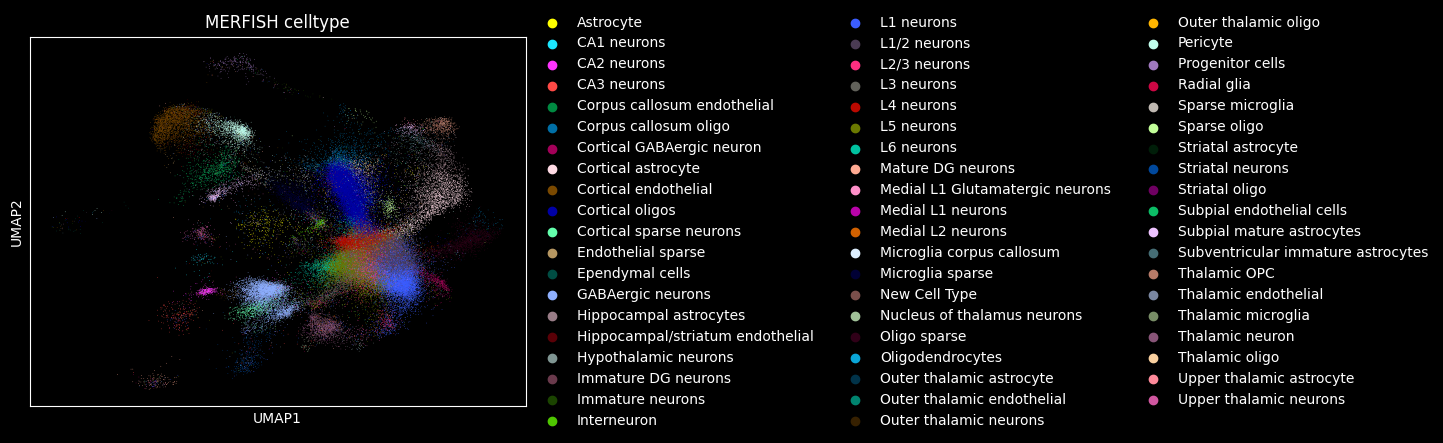

In [6]:
sc.pl.umap(adata, color = 'MERFISH celltype')

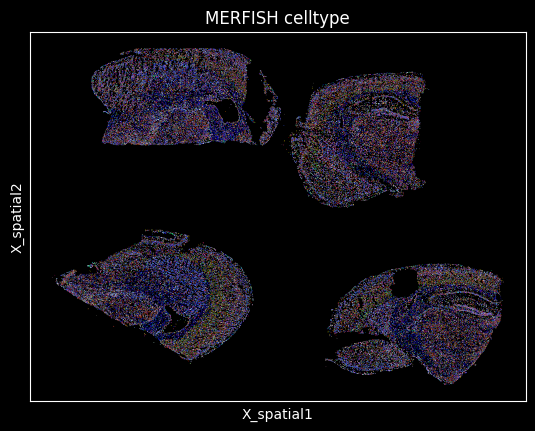

In [10]:
sc.pl.embedding(adata, basis = 'X_spatial', color = 'MERFISH celltype', legend_loc = 'on')

In [7]:
adata.obs['MERFISH celltype'].value_counts()

L1/2 neurons                          21414
L1 neurons                            18154
Cortical oligos                       16984
L5 neurons                            16023
L4 neurons                             7949
L3 neurons                             7761
GABAergic neurons                      6483
Medial L2 neurons                      4302
L2/3 neurons                           4123
Cortical endothelial                   2793
Cortical astrocyte                     2377
Microglia sparse                       2075
Pericyte                               1990
Thalamic neuron                        1917
L6 neurons                             1856
Corpus callosum oligo                  1747
Medial L1 neurons                      1730
Oligo sparse                           1707
Hippocampal astrocytes                 1030
Cortical sparse neurons                 842
Subpial endothelial cells               815
Subpial mature astrocytes               803
Cortical GABAergic neuron       

In [11]:
adata_cosmx_ingest = Jenie(adata, 'adata_cosmx_ingest', 'adata_cosmx_ingest', pallete = 'merfish_celltype')

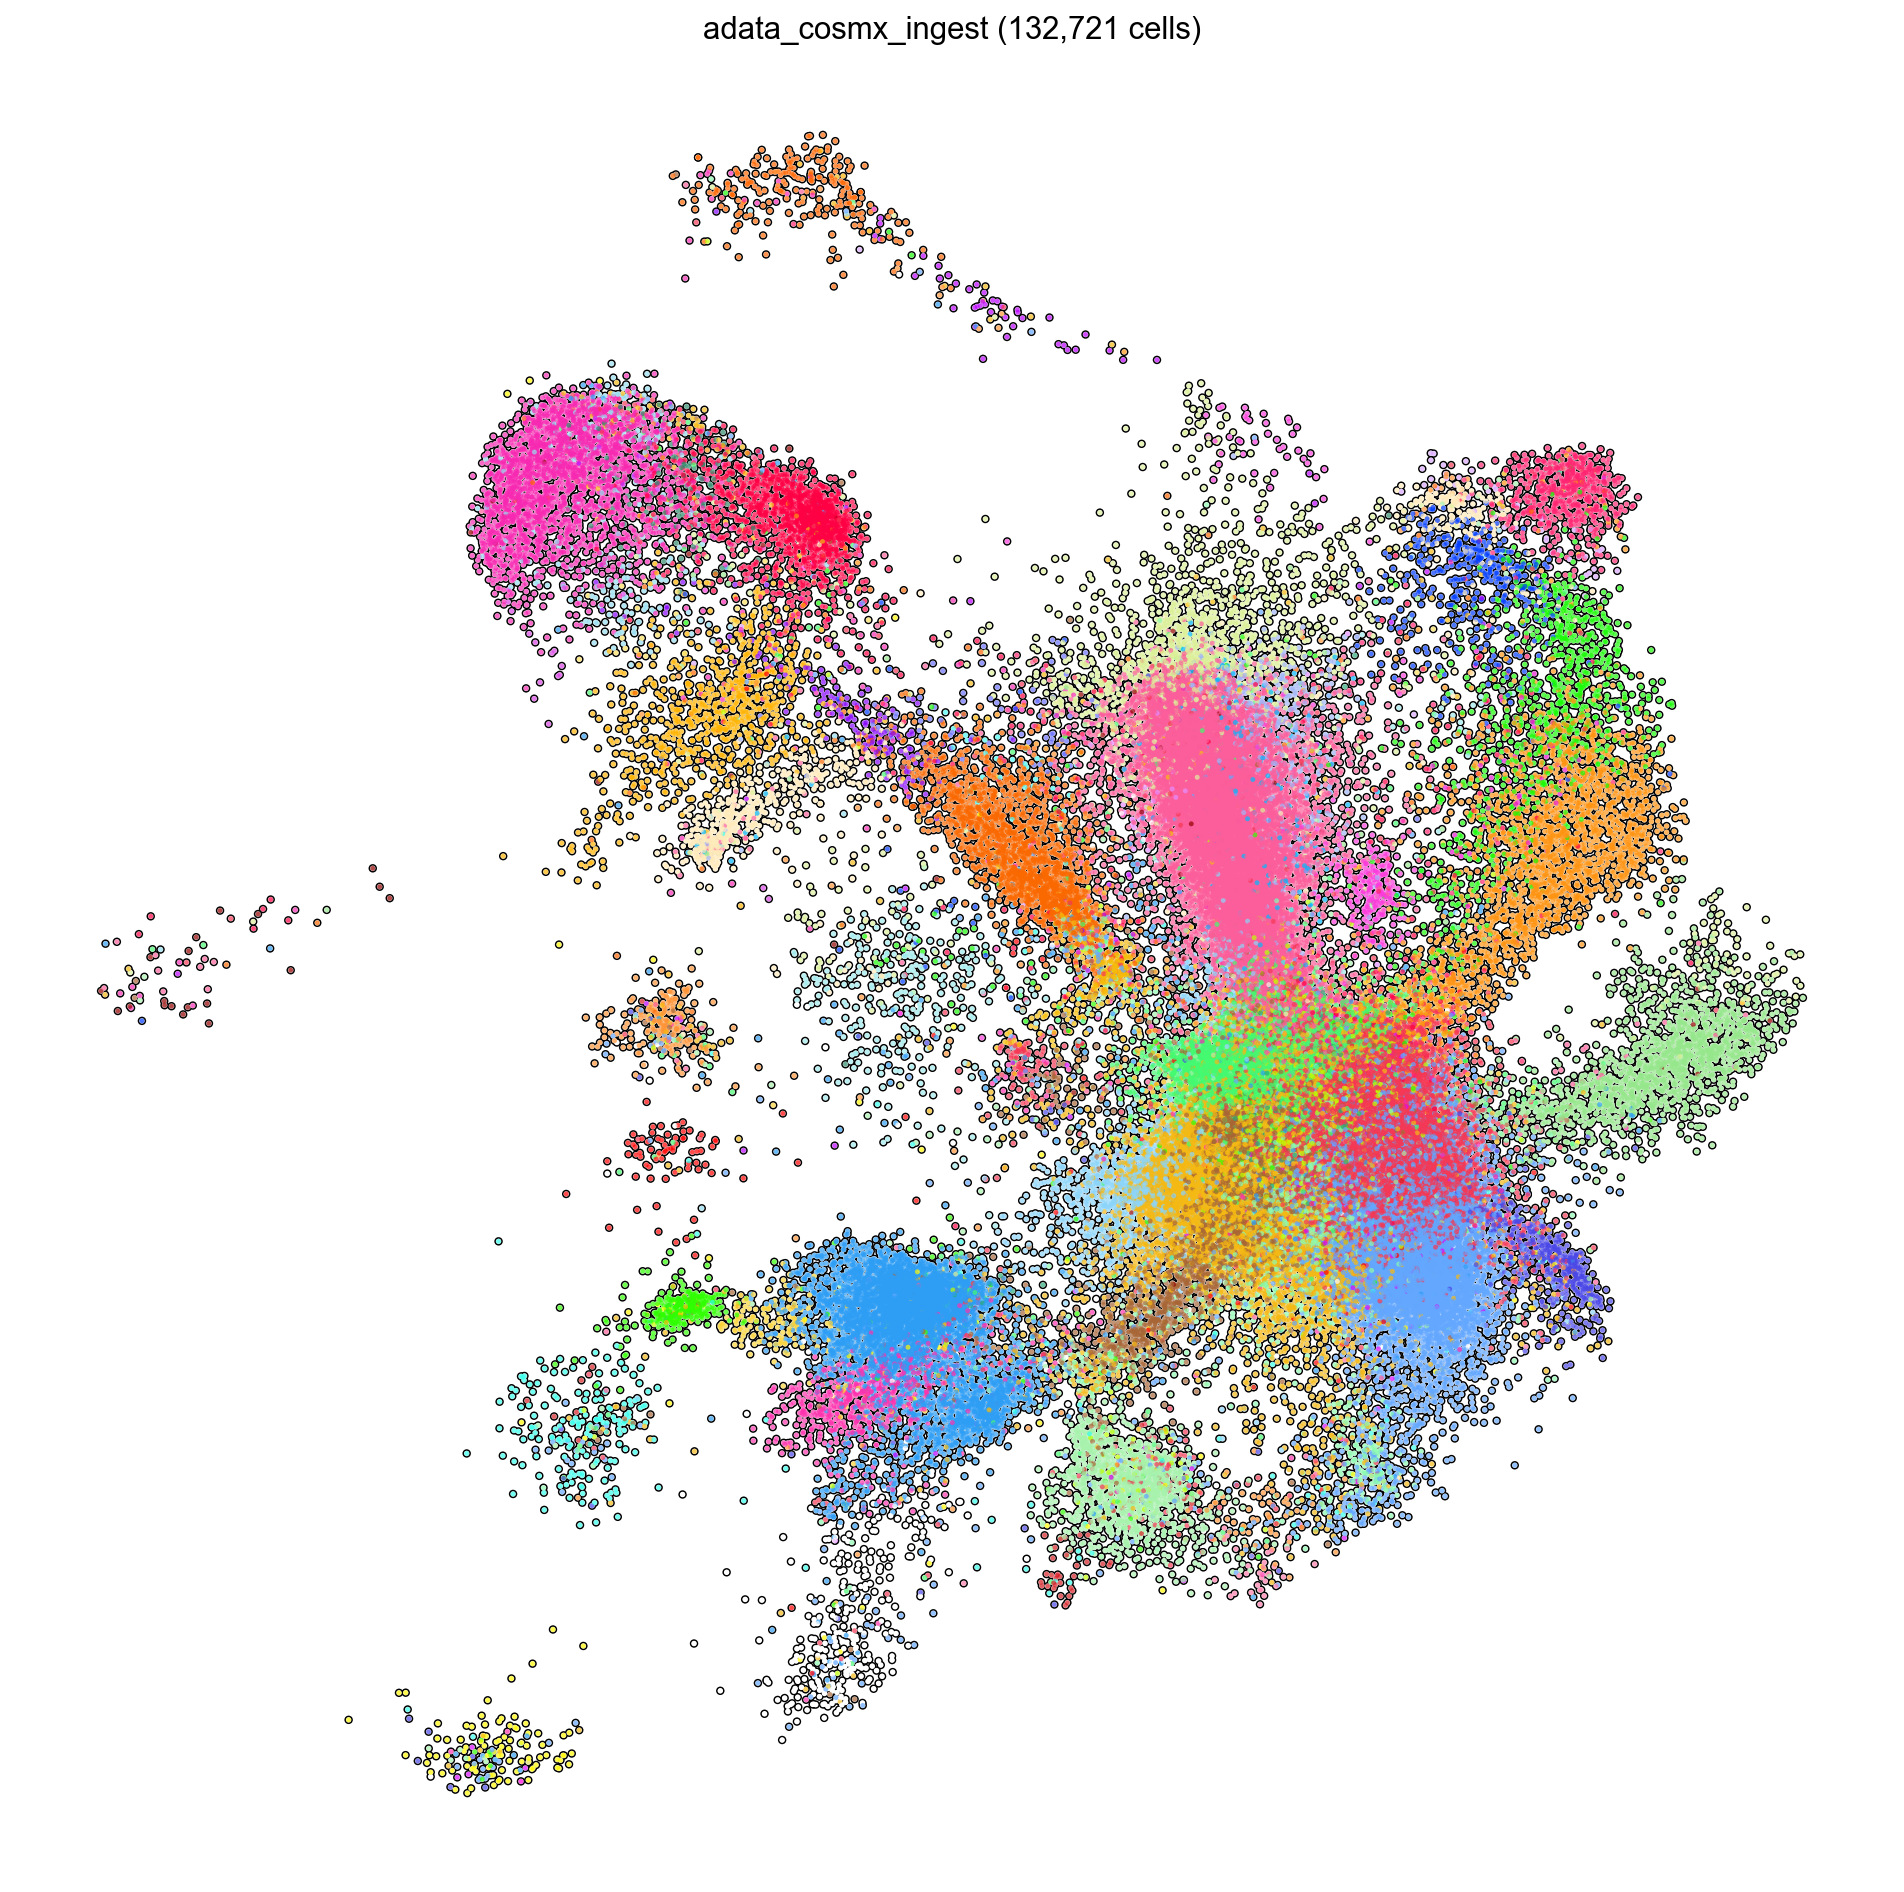

In [12]:
adata_cosmx_ingest.umap(group = 'MERFISH celltype')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


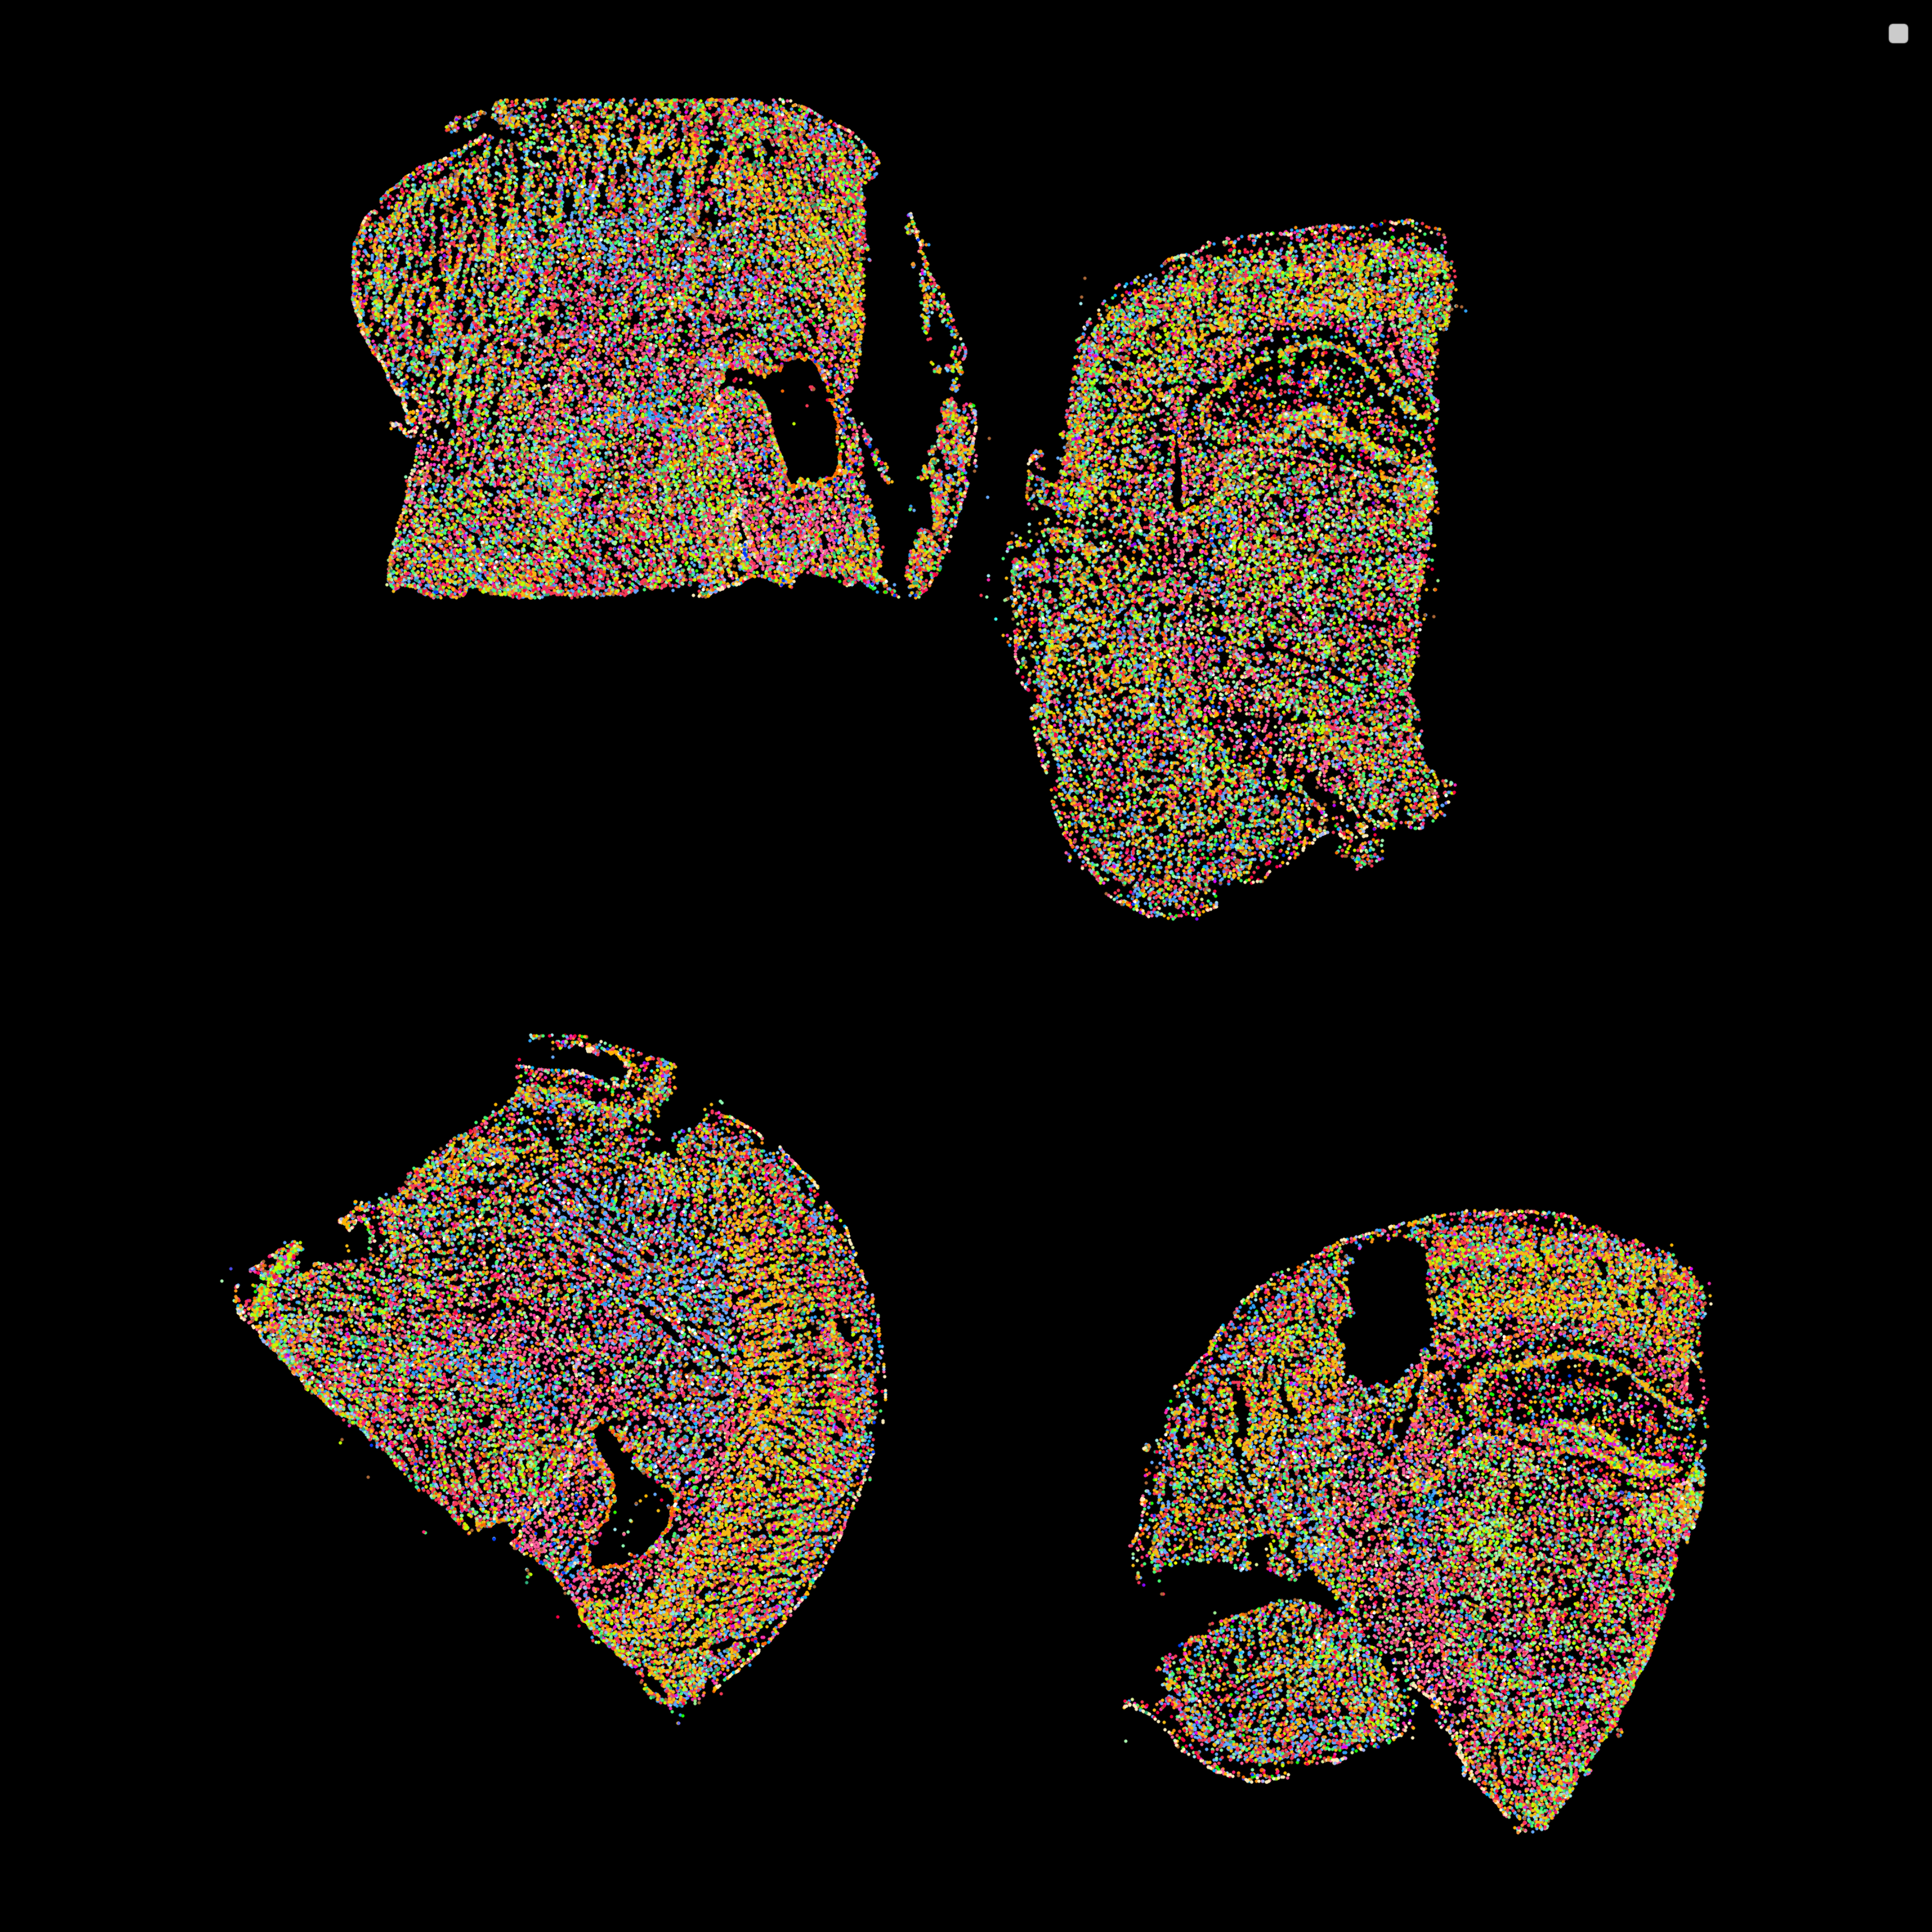

In [14]:
adata_cosmx_ingest.plot_cluster_scdata(group = 'MERFISH celltype', sbig = 3)